<a href="https://colab.research.google.com/github/statistical-lies/Binary-classification-with-Artificial-neural-networks/blob/main/Aims_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
#importing useful packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras 

In [ ]:
#importing the data into python
data=pd.read_csv("/content/as1-bank.csv")
data

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,144,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,73,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,140,1,143,3,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1,no,1475,yes,no,0,1166,3,530,12,2,no
7838,53,1,2,no,583,no,no,0,226,1,184,4,1,yes
7839,73,1,1,no,2850,no,no,0,300,1,40,8,0,yes
7840,72,1,1,no,5715,no,no,0,1127,5,184,3,1,yes


# Exploratory Data Ananlysis

In [ ]:
#describing the data
data.describe()

,age,marital,education,balance,contact,duration,campaign,pdays,previous,poutcome
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,40.783856,0.800179,1.206707,1552.343280,0.074598,261.290615,2.064269,223.252869,3.184264,0.626498
std,11.282964,0.621418,0.649716,3084.580003,0.262759,236.203272,1.566109,111.830127,4.614190,0.824863
min,18.000000,0.000000,0.000000,-1884.000000,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000
25%,32.000000,0.000000,1.000000,162.000000,0.000000,113.000000,1.000000,133.000000,1.000000,0.000000
50%,38.000000,1.000000,1.000000,595.000000,0.000000,194.000000,2.000000,195.000000,2.000000,0.000000
75%,47.000000,1.000000,2.000000,1733.750000,0.000000,324.000000,2.000000,326.000000,4.000000,1.000000
max,89.000000,2.000000,2.000000,81204.000000,1.000000,2219.000000,16.000000,871.000000,275.000000,2.000000


In [ ]:
#checking the columns
data.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [ ]:
# shape of the data(number of columns and rows)
data.shape

(7842, 14)

In [ ]:
#checking the data types
data.dtypes

age           int64
marital       int64
education     int64
default      object
balance       int64
housing      object
loan         object
contact       int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int64
y            object
dtype: object

In [ ]:
#checking for missing values
data.isnull().sum()

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#correlation between the values
data.corr()

<ipython-input-29-9afec05538ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,marital,education,balance,contact,duration,campaign,pdays,previous,poutcome
age,1.000000,0.414200,-0.180317,0.117283,0.190545,0.058902,0.000736,-0.106095,0.003396,-0.019789
marital,0.414200,1.000000,-0.136804,0.022515,0.021788,0.007142,0.007432,0.006627,-0.004370,-0.037888
education,-0.180317,-0.136804,1.000000,0.079308,-0.097806,-0.003055,-0.027096,-0.160157,0.009883,0.014860
balance,0.117283,0.022515,0.079308,1.000000,0.046259,0.040550,-0.011874,-0.101847,0.001708,0.016010
contact,0.190545,0.021788,-0.097806,0.046259,1.000000,-0.003481,0.109836,-0.012790,0.042098,0.040306
duration,0.058902,0.007142,-0.003055,0.040550,-0.003481,1.000000,-0.094348,-0.009571,-0.001776,0.049217
campaign,0.000736,0.007432,-0.027096,-0.011874,0.109836,-0.094348,1.000000,0.063530,0.137044,0.107634
pdays,-0.106095,0.006627,-0.160157,-0.101847,-0.012790,-0.009571,0.063530,1.000000,-0.026708,-0.099284
previous,0.003396,-0.004370,0.009883,0.001708,0.042098,-0.001776,0.137044,-0.026708,1.000000,0.091769
poutcome,-0.019789,-0.037888,0.014860,0.016010,0.040306,0.049217,0.107634,-0.099284,0.091769,1.000000


## **Exploratory Data Ananlysis on poutcome**

In [ ]:
# counts of poutcome
data.poutcome.value_counts()

0    4679
2    1750
1    1413
Name: poutcome, dtype: int64

<Axes: xlabel='poutcome', ylabel='count'>

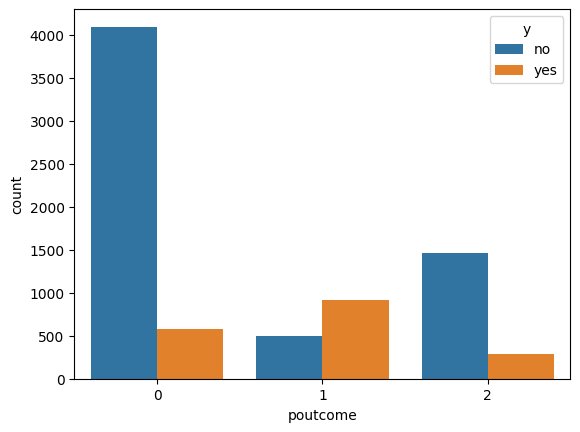

In [ ]:
#ploting poutcome
#countplot of employment with status 
sns.countplot(x='poutcome',hue='y',data=data)

# Exploratory Data Ananlysis on education

In [ ]:
#unique values in education
data.education.value_counts()

1    4197
2    2633
0    1012
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

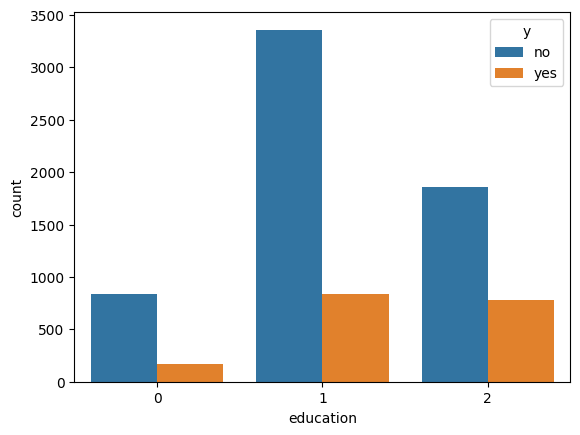

In [ ]:
#countplot of years of education
sns.countplot(x='education',hue='y',data=data)

# Exploratory Data Ananlysis on marital

---



In [ ]:
#counts of maritals
data.marital.value_counts()

1    4501
0    2454
2     887
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

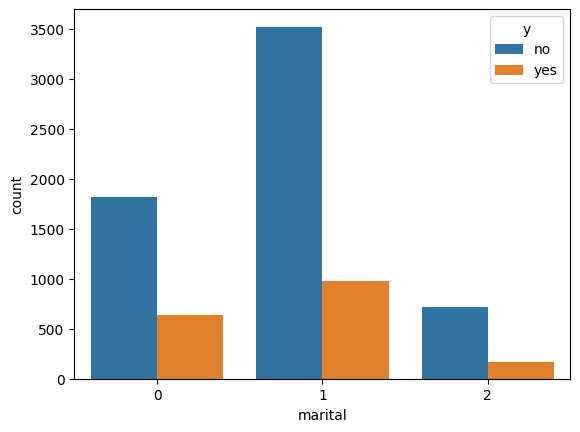

In [ ]:
#countplot of maritals
sns.countplot(x='marital',hue='y',data=data)

In [ ]:
data.head(2)

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes


In [ ]:
data.contact.value_counts()

0    7257
1     585
Name: contact, dtype: int64

## **Exploratory Data Ananlysis on default**

In [ ]:
#count of default
data.default.value_counts()

no     7786
yes      56
Name: default, dtype: int64

<Axes: xlabel='default', ylabel='count'>

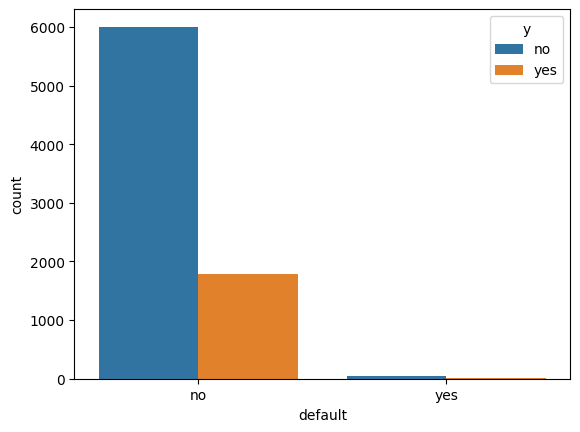

In [ ]:
#countplot of default
sns.countplot(x='default',hue='y',data=data)

# Exploratory Data Ananlysis on loan

In [ ]:
#counts of loan
data.loan.value_counts()

no     6753
yes    1089
Name: loan, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

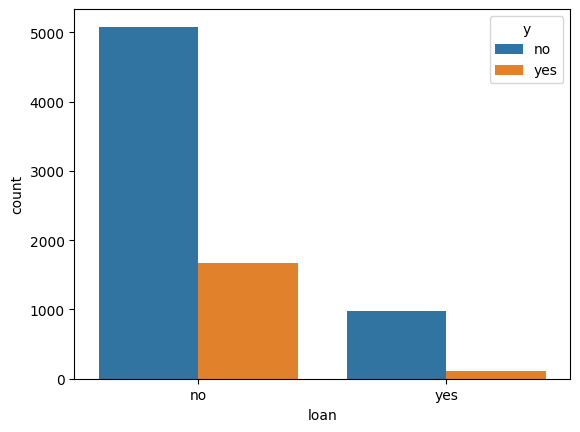

In [ ]:
#countplot of loan
sns.countplot(x='loan',hue='y',data=data)

# Exploratory Data Ananlysis on housing

In [ ]:
#counts of housing
data.housing.value_counts()

yes    4942
no     2900
Name: housing, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

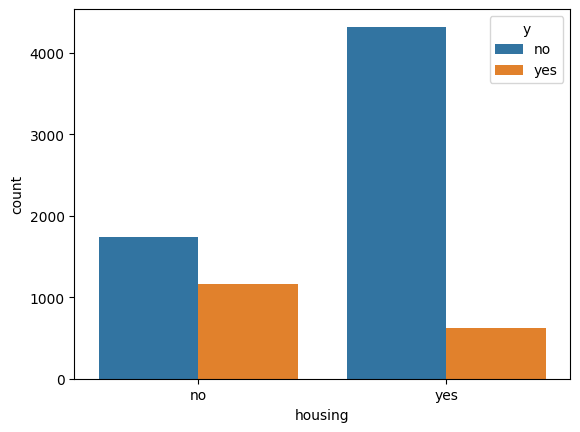

In [ ]:
#countplot of housing
sns.countplot(x='housing',hue='y',data=data)

# Exploratory Data Ananlysis on contact

In [ ]:
data.contact.value_counts()

0    7257
1     585
Name: contact, dtype: int64

<Axes: xlabel='contact', ylabel='count'>

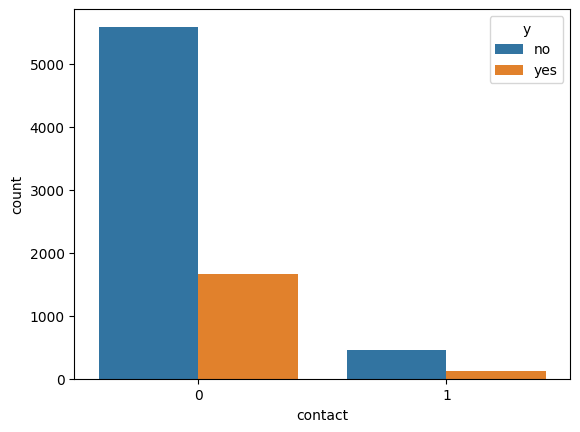

In [ ]:
#countplot of contact
sns.countplot(x='contact',hue='y',data=data)

# **Exploratory Data Ananlysis on y**

In [ ]:
#counts of y
data.y.value_counts()

no     6056
yes    1786
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

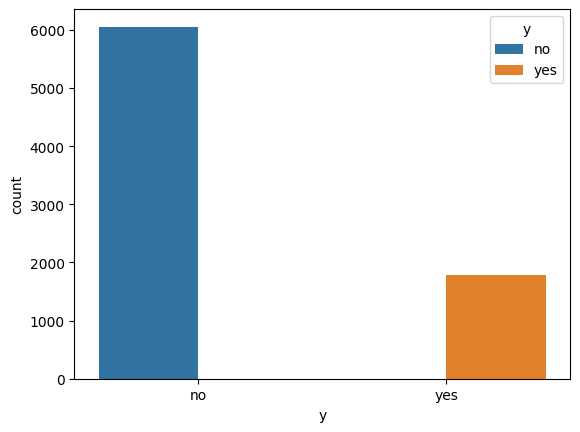

In [ ]:
#countplot of contact
sns.countplot(x='y',hue='y',data=data)

# Exploratory Data Ananlysis on pdays

In [ ]:
#counts for pdays
data1=data[data.y=='no'].pdays
data2=data[data.y=='yes'].pdays

Text(0, 0.5, 'y')

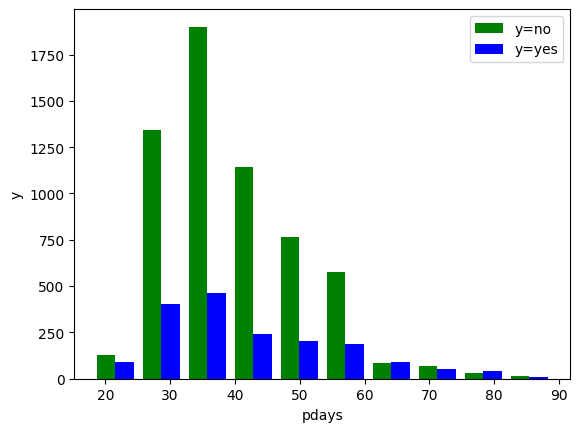

In [ ]:
plt.hist([data1,data2],color=['green','blue'],label=['y=no','y=yes'])
plt.legend()
plt.xlabel('pdays')
plt.ylabel('y')

# Exploratory Data Ananlysis on age

In [ ]:
#counts for age
data3=data[data.y=='no'].age
data4=data[data.y=='yes'].age

Text(0, 0.5, 'y')

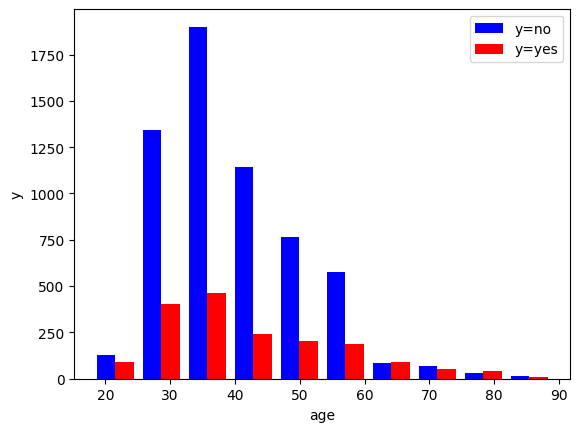

In [ ]:
#countplot of age with y
plt.hist([data3,data4],color=['blue','red'],label=['y=no','y=yes'])
plt.legend()
plt.xlabel('age')
plt.ylabel('y')

In [ ]:
#defining function to print only categorical values with yes and no
def col_unique_values(data):
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column}: {data[column].unique()}')

In [ ]:
#all yes and no values
col_unique_values(data)

default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
y: ['no' 'yes']


In [ ]:

#changing all yes=1 and no=0
yes_no_col=['default','housing','loan','y']

for col in yes_no_col:
    data[col].replace({'yes':1,'no':0},inplace=True)

In [ ]:
#defining our x and y
X=data.drop('y',axis='columns')
y=data['y']

# **1 Hidden layer**

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=5)

#building the model with 13 input layers, 1 hidde layer and 1 output layer
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 13 input layers, 1 hidde layer and 1 output layer
# loss and accuracy
history=model.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

In [ ]:
#scalling balance, duration, pdays,age,previous

scale= ['balance','duration','pdays','age','previous','education','poutcome','campaign']

from sklearn.preprocessing  import MinMaxScaler
scaler= MinMaxScaler()

data[scale]=scaler.fit_transform(data[scale])

In [ ]:
#building the model with 13 input layers, 1 hidde layer and 1 output layer
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=5)
loss,accuracy =model.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/5
197/197 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7593
Epoch 2/5
197/197 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7689
Epoch 3/5
197/197 [==============================] - 1s 3ms/step - loss: 0.4718 - accuracy: 0.7692
Epoch 4/5
197/197 [==============================] - 1s 3ms/step - loss: 0.4553 - accuracy: 0.7781
Epoch 5/5
50/50 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8062
loss:0.4273461401462555
accuracy: 0.8062460422515869


In [ ]:
# 13 input layers, 1 hidde layer and 1 output layer
# loss and accuracy
history=model.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7975 - val_loss: 0.4689 - val_accuracy: 0.7850
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8043 - val_loss: 0.4687 - val_accuracy: 0.7818
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8041 - val_loss: 0.4613 - val_accuracy: 0.7898
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8069 - val_loss: 0.4538 - val_accuracy: 0.7930
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8076 - val_loss: 0.4493 - val_accuracy: 0.7946
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8126 - val_loss: 0.4482 - val_accuracy: 0.7914
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8156 - val_loss: 0.4463 - val_accuracy: 0.7898

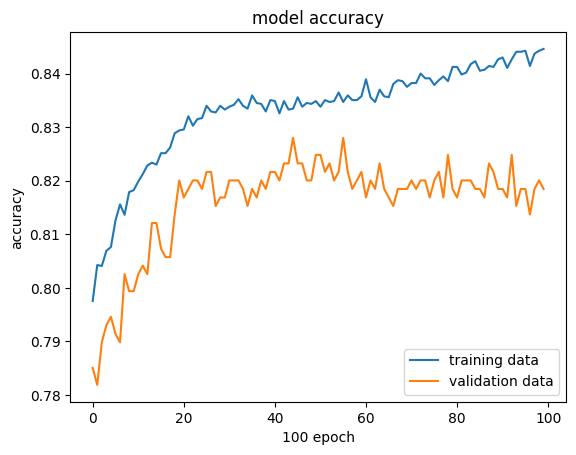

In [ ]:
#Graph of the performance of the training data and validation data in accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

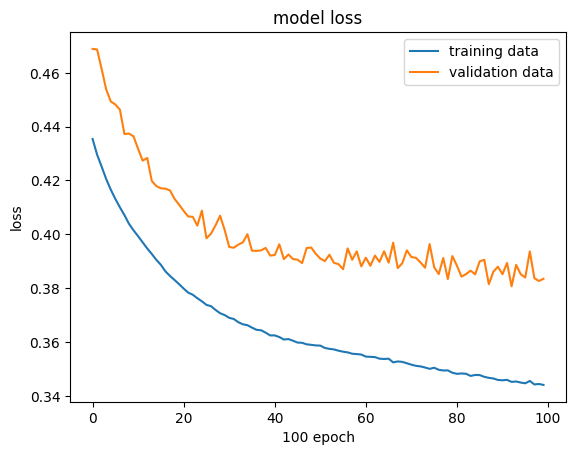

In [ ]:
#Graph of the performance of the training data and validation data in data loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
#Evaluate model in test accuracy
model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8521


[0.34457528591156006, 0.8521351218223572]

In [ ]:
# prediction on X_test
Y_pred=model.predict(X_test)
y_pred = []
for element in Y_pred:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(Y_pred)

50/50 [==============================] - 0s 2ms/step
[[0.04315693]
 [0.6434707 ]
 [0.61289114]
 ...
 [0.14706287]
 [0.7550661 ]
 [0.00992067]]


In [ ]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [ ]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#classification Report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1233
           1       0.70      0.55      0.61       336

    accuracy                           0.85      1569
   macro avg       0.79      0.74      0.76      1569
weighted avg       0.84      0.85      0.85      1569



Text(58.222222222222214, 0.5, 'Truth')

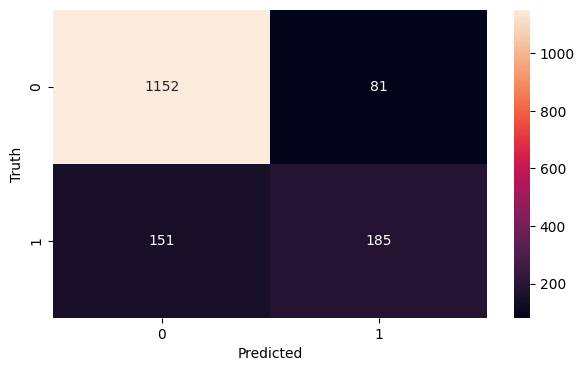

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 2 hidden layers

In [ ]:
#building the model with 13 input layers, 2 hidde layer and 1 output layer
model2 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 13 input layers, 2 hidde layer and 1 output layer
# loss and accuracy
history2=model2.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model2.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5508 - accuracy: 0.7444 - val_loss: 0.5195 - val_accuracy: 0.7420
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7717 - val_loss: 0.4949 - val_accuracy: 0.7389
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7800 - val_loss: 0.4817 - val_accuracy: 0.7739
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4340 - accuracy: 0.7968 - val_loss: 0.4669 - val_accuracy: 0.7834
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8000 - val_loss: 0.4559 - val_accuracy: 0.7834
Epoch 6/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4130 - accuracy: 0.8080 - val_loss: 0.4477 - val_accuracy: 0.7882
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8113 - val_loss: 0.4400 - val_accuracy: 0.7882

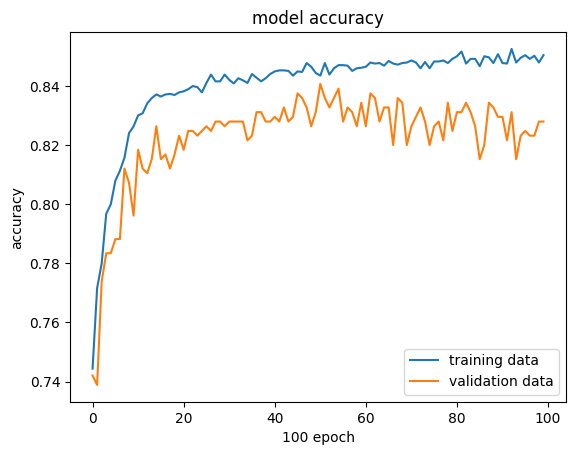

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

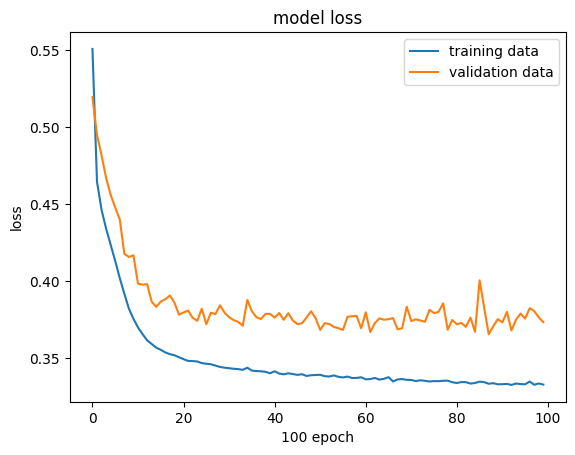

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
#Evaluate model
model2.evaluate(X_test, y_test)

50/50 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8464


[0.34330490231513977, 0.8463990092277527]

In [ ]:
# prediction on X_test
Y_pred2=model2.predict(X_test)
y_pred2 = []
for element in Y_pred2:
    if element > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)
print(Y_pred2)

50/50 [==============================] - 0s 1ms/step
[[0.04013894]
 [0.71772623]
 [0.6433309 ]
 ...
 [0.15485713]
 [0.8360409 ]
 [0.009714  ]]


In [ ]:
#classification Report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1233
           1       0.66      0.58      0.62       336

    accuracy                           0.85      1569
   macro avg       0.77      0.75      0.76      1569
weighted avg       0.84      0.85      0.84      1569



Text(58.222222222222214, 0.5, 'Truth')

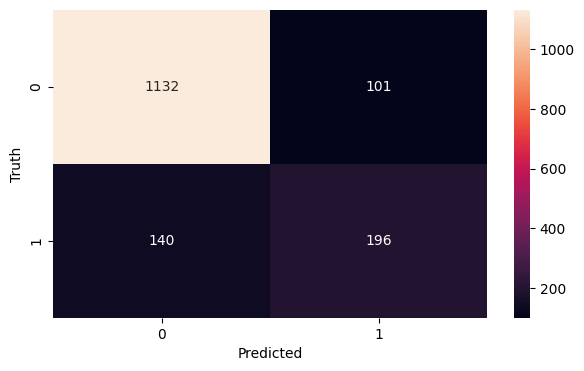

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred2)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 3 hidden layers

In [ ]:
#building the model with 13 input layers, 3 hidde layer and 1 output layer
model3 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 13 input layers, 3 hidde layer and 1 output layer
# loss and accuracy
history3=model3.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model3.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/100
177/177 [==============================] - 2s 4ms/step - loss: 0.5510 - accuracy: 0.7713 - val_loss: 0.5425 - val_accuracy: 0.7420
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7718 - val_loss: 0.5088 - val_accuracy: 0.7420
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.7849 - val_loss: 0.4799 - val_accuracy: 0.7834
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8039 - val_loss: 0.4578 - val_accuracy: 0.7978
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8050 - val_loss: 0.4379 - val_accuracy: 0.8041
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8163 - val_loss: 0.4214 - val_accuracy: 0.8041
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.3856 - accuracy: 0.8211 - val_loss: 0.4144 - val_accuracy: 0.8185

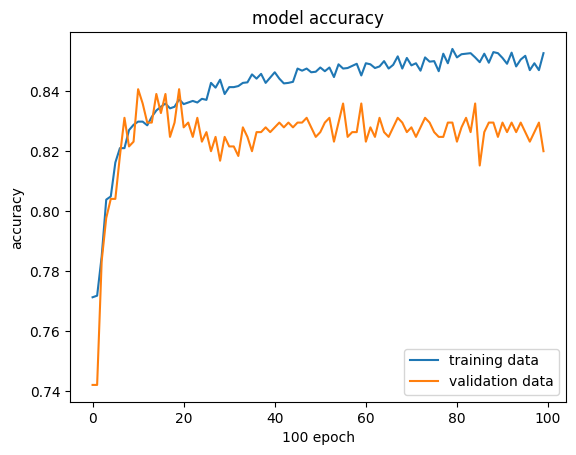

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

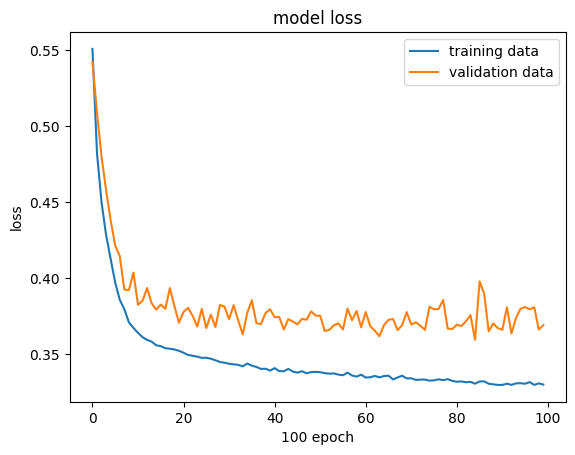

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
#Evaluate model
model3.evaluate(X_test, y_test)

50/50 [==============================] - 0s 6ms/step - loss: 0.3410 - accuracy: 0.8451


[0.34101054072380066, 0.8451243042945862]

In [ ]:
# prediction on X_test
Y_pred3=model3.predict(X_test)
y_pred3 = []
for element in Y_pred3:
    if element > 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)
print(Y_pred3)

50/50 [==============================] - 0s 4ms/step
[[0.00156283]
 [0.7823436 ]
 [0.5261571 ]
 ...
 [0.09679501]
 [0.77658415]
 [0.00386819]]


In [ ]:
#classification Report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1233
           1       0.65      0.60      0.62       336

    accuracy                           0.85      1569
   macro avg       0.77      0.76      0.76      1569
weighted avg       0.84      0.85      0.84      1569



Text(58.222222222222214, 0.5, 'Truth')

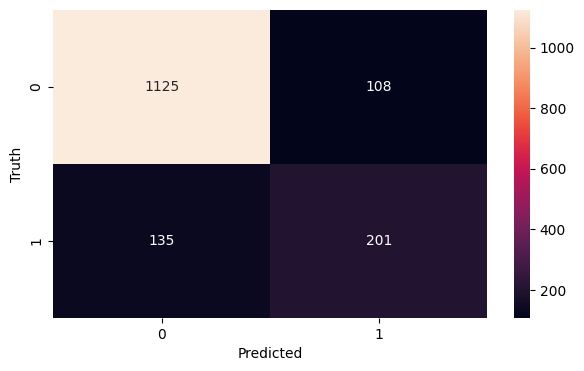

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred3)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 4 hidden layers

In [ ]:
#building the model with 13 input layers, 3 hidde layer and 1 output layer
model4 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
       keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 13 input layers, 3 hidde layer and 1 output layer
# loss and accuracy
history4=model4.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model4.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/100
177/177 [==============================] - 3s 5ms/step - loss: 0.5896 - accuracy: 0.6941 - val_loss: 0.5281 - val_accuracy: 0.7420
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.7720 - val_loss: 0.5084 - val_accuracy: 0.7420
Epoch 3/100
177/177 [==============================] - 1s 5ms/step - loss: 0.4483 - accuracy: 0.7842 - val_loss: 0.4803 - val_accuracy: 0.7914
Epoch 4/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4257 - accuracy: 0.8090 - val_loss: 0.4521 - val_accuracy: 0.8105
Epoch 5/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4012 - accuracy: 0.8159 - val_loss: 0.4227 - val_accuracy: 0.8185
Epoch 6/100
177/177 [==============================] - 1s 6ms/step - loss: 0.3775 - accuracy: 0.8257 - val_loss: 0.4035 - val_accuracy: 0.8217
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.3673 - accuracy: 0.8328 - val_loss: 0.4005 - val_accuracy: 0.8217

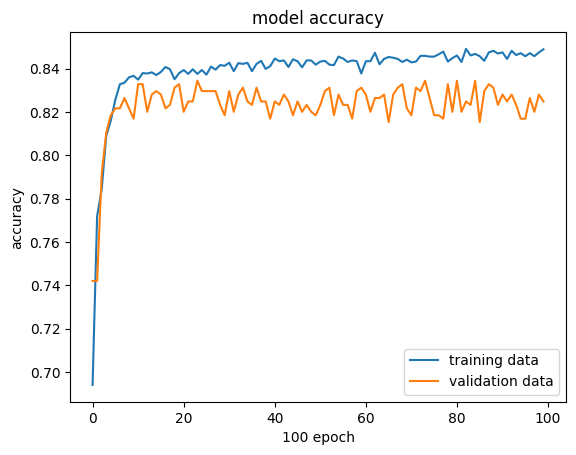

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')


plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

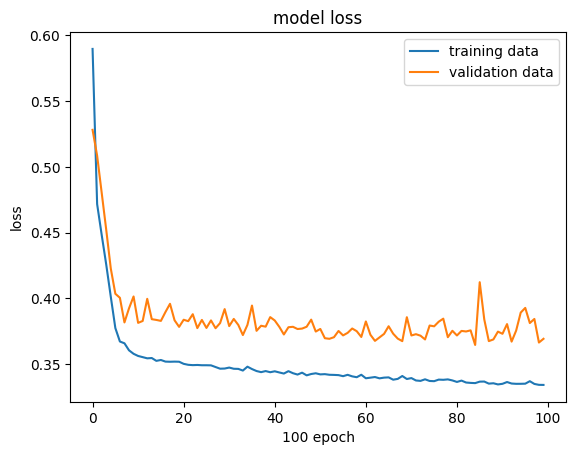

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
#Evaluate model
model4.evaluate(X_test, y_test)

50/50 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.8502


[0.34825950860977173, 0.8502230644226074]

In [ ]:
# prediction on X_test
Y_pred4=model4.predict(X_test)
y_pred4 = []
for element in Y_pred4:
    if element > 0.5:
        y_pred4.append(1)
    else:
        y_pred4.append(0)
print(Y_pred4)


50/50 [==============================] - 0s 2ms/step
[[7.9329198e-05]
 [7.6375753e-01]
 [6.9457024e-01]
 ...
 [1.3345581e-01]
 [7.8908283e-01]
 [5.1821140e-03]]


In [ ]:
#classification Report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1233
           1       0.66      0.61      0.64       336

    accuracy                           0.85      1569
   macro avg       0.78      0.76      0.77      1569
weighted avg       0.85      0.85      0.85      1569



Text(58.222222222222214, 0.5, 'Truth')

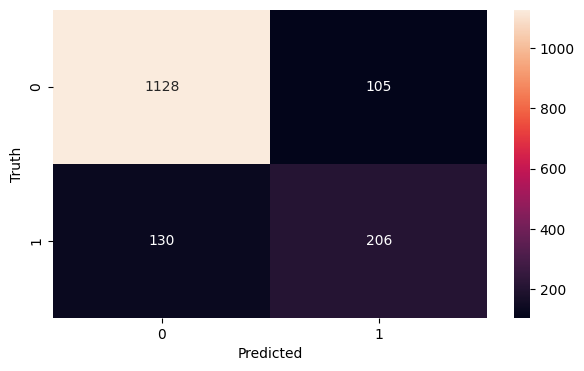

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred4)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## *Dataset without scaling or standardization *

In [ ]:
#importing the data into python
data1=pd.read_csv("/content/as1-bank.csv")

#changing all yes=1 and no=0
yes_no_col=['default','housing','loan','y']

for col in yes_no_col:
    data1[col].replace({'yes':1,'no':0},inplace=True)

In [ ]:
data1

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,0,882,0,0,1,39,1,151,3,0,0
1,42,0,1,0,-247,1,1,1,519,1,166,1,2,1
2,33,1,1,0,3444,1,0,1,144,1,91,4,0,1
3,36,1,2,0,2415,1,0,1,73,1,86,4,2,0
4,36,1,2,0,0,1,0,1,140,1,143,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1,0,1475,1,0,0,1166,3,530,12,2,0
7838,53,1,2,0,583,0,0,0,226,1,184,4,1,1
7839,73,1,1,0,2850,0,0,0,300,1,40,8,0,1
7840,72,1,1,0,5715,0,0,0,1127,5,184,3,1,1


## **1 hidden layer**

In [ ]:
#defining our x and y
X=data1.drop('y',axis='columns')
y=data1['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=5)

#building the model with 13 input layers, 1 hidde layer and 1 output layer
model1 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])


model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 13 input layers, 1 hidde layer and 1 output layer
# loss and accuracy
history10=model1.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model1.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/100
177/177 [==============================] - 1s 3ms/step - loss: 58.7688 - accuracy: 0.5502 - val_loss: 10.1615 - val_accuracy: 0.6799
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 4.2948 - accuracy: 0.6857 - val_loss: 2.6340 - val_accuracy: 0.7389
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 2.0530 - accuracy: 0.7378 - val_loss: 2.6225 - val_accuracy: 0.7293
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 1.8088 - accuracy: 0.7316 - val_loss: 3.5862 - val_accuracy: 0.7341
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 1.5057 - accuracy: 0.7453 - val_loss: 1.6090 - val_accuracy: 0.6831
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 1.7298 - accuracy: 0.7304 - val_loss: 1.3545 - val_accuracy: 0.7357
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 1.3329 - accuracy: 0.7336 - val_loss: 2.2412 - val_accuracy: 0.60

(<matplotlib.legend.Legend at 0x7f17c9e94550>,)

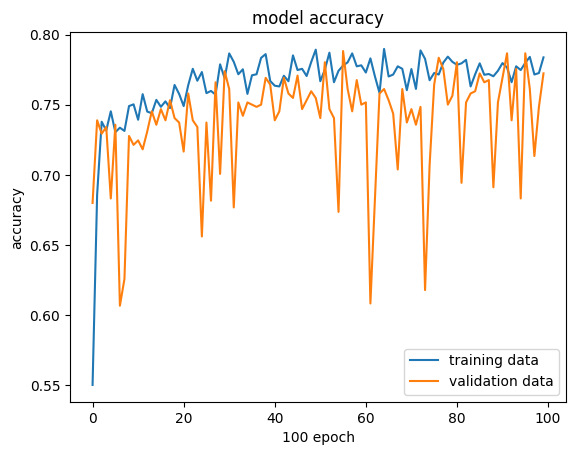

In [ ]:
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right'),


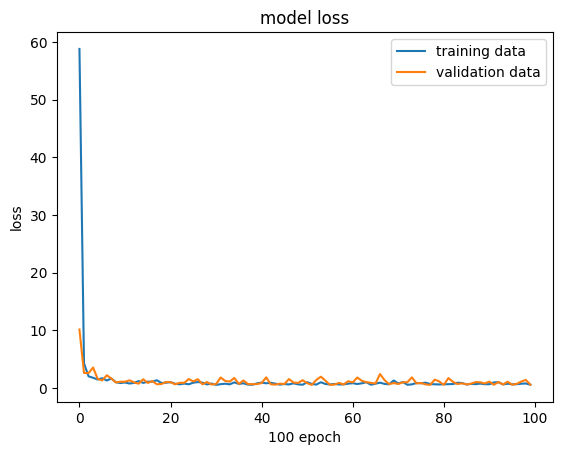

In [ ]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

50/50 [==============================] - 0s 2ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1233
           1       0.00      0.00      0.00       336

    accuracy                           0.79      1569
   macro avg       0.39      0.50      0.44      1569
weighted avg       0.62      0.79      0.69      1569



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(58.222222222222214, 0.5, 'Truth')

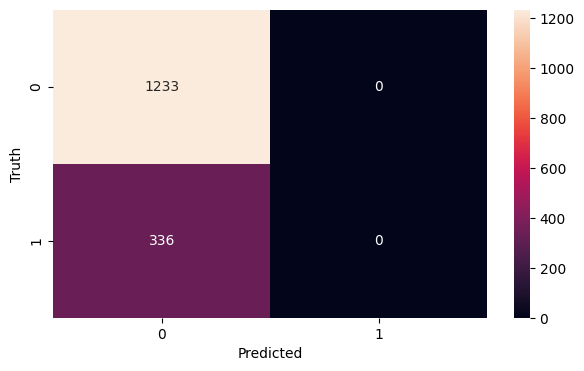

In [ ]:
#Evaluate model
model1.evaluate(X_test, y_test),

# prediction on X_test
Y_pred4=model4.predict(X_test)
y_pred4 = []
for element in Y_pred4:
    if element > 0.5:
        y_pred4.append(1)
    else:
        y_pred4.append(0)
print(Y_pred4),


#classification Report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred4))

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred4)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **2 hidden layers**

In [ ]:
#building the model with 13 input layers, 2 hidde layer and 1 output layer
model11 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])


model11.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 13 input layers, 1 hidde layer and 1 output layer
# loss and accuracy
history11=model11.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model11.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/100
177/177 [==============================] - 1s 3ms/step - loss: 10.2241 - accuracy: 0.6781 - val_loss: 6.0499 - val_accuracy: 0.7404
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 3.5458 - accuracy: 0.7228 - val_loss: 3.1208 - val_accuracy: 0.7197
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 2.4561 - accuracy: 0.7215 - val_loss: 3.8515 - val_accuracy: 0.7452
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 1.5401 - accuracy: 0.7284 - val_loss: 1.4963 - val_accuracy: 0.7516
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 1.3551 - accuracy: 0.7352 - val_loss: 1.1129 - val_accuracy: 0.7420
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 1.2723 - accuracy: 0.7394 - val_loss: 0.7796 - val_accuracy: 0.7484
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 1.1034 - accuracy: 0.7302 - val_loss: 4.6456 - val_accuracy: 0.541

(<matplotlib.legend.Legend at 0x7f17b77f1d50>,)

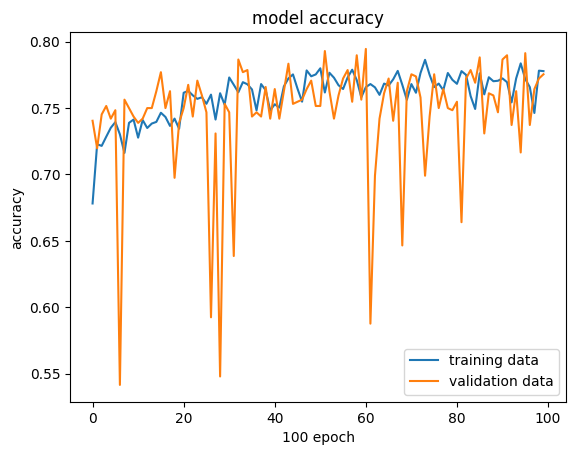

In [ ]:
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right'),

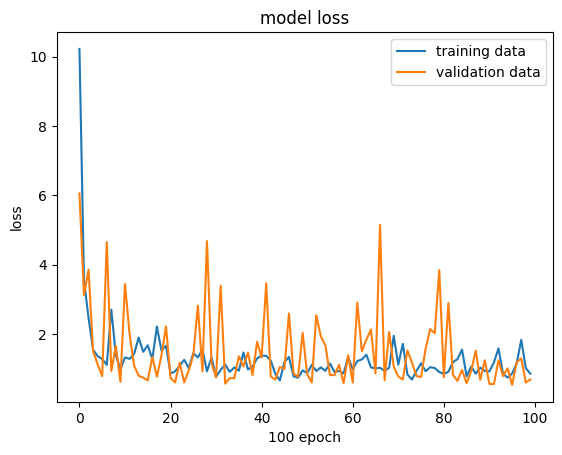

In [ ]:
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

50/50 [==============================] - 0s 1ms/step
[[0.00939027]
 [0.10473125]
 [0.7661527 ]
 ...
 [0.00699301]
 [0.6890496 ]
 [0.00345055]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1233
           1       0.61      0.32      0.42       336

    accuracy                           0.81      1569
   macro avg       0.72      0.63      0.65      1569
weighted avg       0.79      0.81      0.79      1569



Text(58.222222222222214, 0.5, 'Truth')

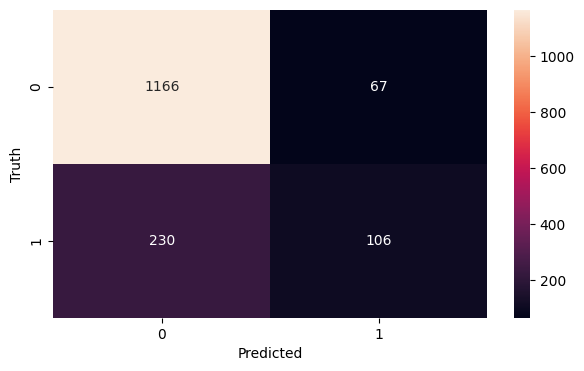

In [ ]:
#Evaluate model
model11.evaluate(X_test, y_test),

# prediction on X_test
Y_pred41=model11.predict(X_test)
y_pred41 = []
for element in Y_pred41:
    if element > 0.5:
        y_pred41.append(1)
    else:
        y_pred41.append(0)
print(Y_pred41),


#classification Report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred41))

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred41)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 3 hidden layers

In [ ]:
#building the model with 13 input layers, 3 hidde layer and 1 output layer
model110 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])


model110.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 13 input layers, 1 hidde layer and 1 output layer
# loss and accuracy
history110=model110.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model110.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/100
177/177 [==============================] - 2s 3ms/step - loss: 2.3675 - accuracy: 0.7136 - val_loss: 1.6964 - val_accuracy: 0.7277
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.7412 - val_loss: 1.0449 - val_accuracy: 0.7213
Epoch 3/100
177/177 [==============================] - 0s 3ms/step - loss: 0.7534 - accuracy: 0.7488 - val_loss: 1.3544 - val_accuracy: 0.7325
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.7515 - accuracy: 0.7444 - val_loss: 2.1126 - val_accuracy: 0.7420
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.7493 - accuracy: 0.7476 - val_loss: 0.7916 - val_accuracy: 0.7404
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.9372 - accuracy: 0.7398 - val_loss: 0.5360 - val_accuracy: 0.7659
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.6821 - accuracy: 0.7575 - val_loss: 1.0371 - val_accuracy: 0.6417

(<matplotlib.legend.Legend at 0x7f17d3fc94b0>,)

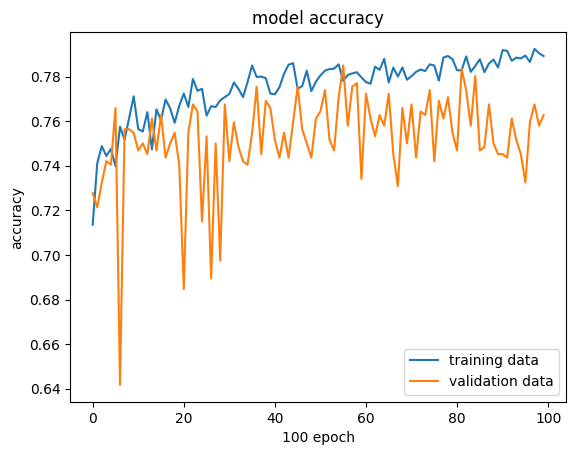

In [ ]:
plt.plot(history110.history['accuracy'])
plt.plot(history110.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right'),

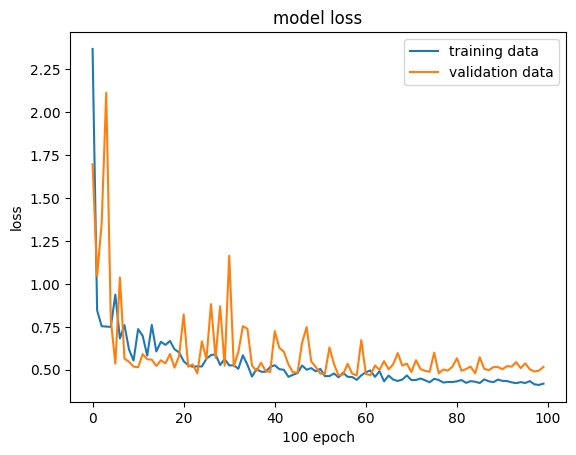

In [ ]:
plt.plot(history110.history['loss'])
plt.plot(history110.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

50/50 [==============================] - 0s 2ms/step
[[3.8604625e-07]
 [4.4064605e-01]
 [6.0244477e-01]
 ...
 [1.5125388e-03]
 [5.1267093e-01]
 [1.5125875e-02]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1233
           1       0.69      0.28      0.40       336

    accuracy                           0.82      1569
   macro avg       0.76      0.62      0.65      1569
weighted avg       0.80      0.82      0.79      1569



Text(58.222222222222214, 0.5, 'Truth')

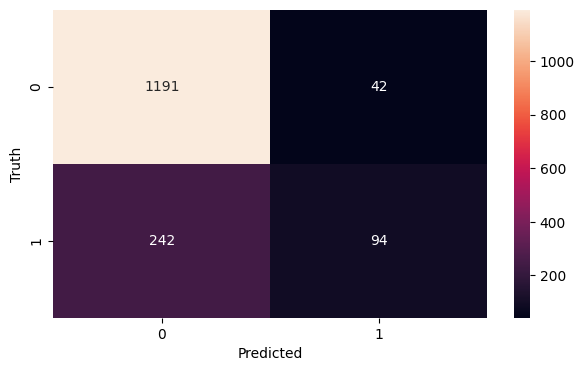

In [ ]:
#Evaluate model
model110.evaluate(X_test, y_test),

# prediction on X_test
Y_pred410=model110.predict(X_test)
y_pred410 = []
for element in Y_pred410:
    if element > 0.5:
        y_pred410.append(1)
    else:
        y_pred410.append(0)
print(Y_pred410),


#classification Report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred410))

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred410)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# 4 hidden layers

In [ ]:
#building the model with 13 input layers, 3 hidde layer and 1 output layer
model1100 = keras.Sequential([
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(12, input_shape=(13,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])


model1100.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 13 input layers, 1 hidde layer and 1 output layer
# loss and accuracy
history1100=model1100.fit(X_train,y_train,validation_split=0.1,epochs=100)
loss,accuracy =model1100.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy: {accuracy}")

Epoch 1/100
177/177 [==============================] - 4s 3ms/step - loss: 7.4656 - accuracy: 0.6064 - val_loss: 1.8676 - val_accuracy: 0.6783
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 1.2354 - accuracy: 0.6893 - val_loss: 1.8507 - val_accuracy: 0.7182
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.8889 - accuracy: 0.7116 - val_loss: 1.8961 - val_accuracy: 0.7229
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.9345 - accuracy: 0.7219 - val_loss: 4.1215 - val_accuracy: 0.7373
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.8124 - accuracy: 0.7391 - val_loss: 1.1624 - val_accuracy: 0.7245
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 1.1627 - accuracy: 0.7228 - val_loss: 0.9086 - val_accuracy: 0.7213
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.7516 - val_loss: 1.4227 - val_accuracy: 0.6003

(<matplotlib.legend.Legend at 0x7f17bc57d270>,)

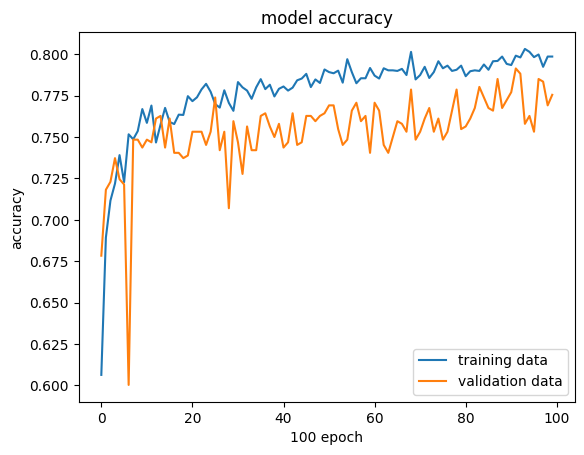

In [ ]:
plt.plot(history1100.history['accuracy'])
plt.plot(history1100.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right'),

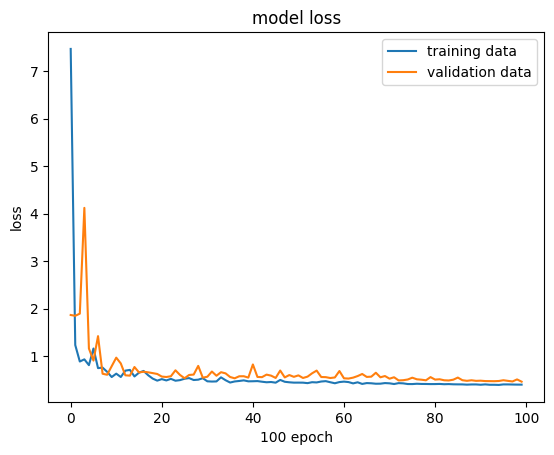

In [ ]:
plt.plot(history1100.history['loss'])
plt.plot(history1100.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('100 epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

50/50 [==============================] - 0s 2ms/step
[[0.00821766]
 [0.3800649 ]
 [0.6730819 ]
 ...
 [0.1751417 ]
 [0.48322627]
 [0.02529931]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      1233
           1       0.60      0.36      0.45       336

    accuracy                           0.81      1569
   macro avg       0.72      0.65      0.67      1569
weighted avg       0.79      0.81      0.79      1569



Text(58.222222222222214, 0.5, 'Truth')

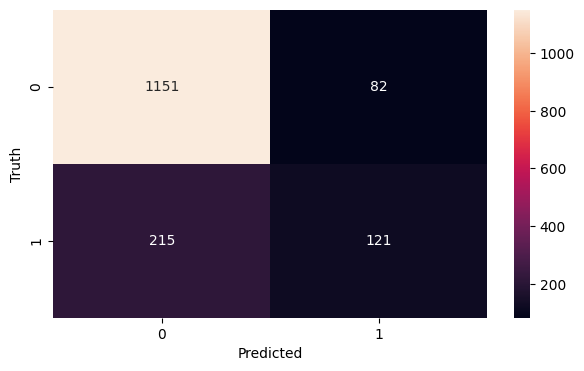

In [ ]:
#Evaluate model
model1100.evaluate(X_test, y_test),

# prediction on X_test
Y_pred4100=model1100.predict(X_test)
y_pred4100 = []
for element in Y_pred4100:
    if element > 0.5:
        y_pred4100.append(1)
    else:
        y_pred4100.append(0)
print(Y_pred4100),


#classification Report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred4100))

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred4100)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')